# Raining Next Day In Australia?
- 1: In this project, I will use historical data to predict whether or not an Australian region is going to rain the next day.
- 2: This project covers data processing and data visualization
- 3: I will explore how each model perform in the binary classification problem
- 4: I will also explore techniques of oversampling and undersampling
- 5: All the models are run under different sampling techniques
- 6: F1 scores, Precision Recall, ROC AUC are calculated for each model

### 1: Data Preprocessing
### 2: Data Visualization/Further Processing
### 3: SMOTE and ENN, Train/Test Split
### 4: Models without data manipulation
### 5: Models with SMOTE
### 6: Models with SMOTETomek 
### 7: Models with SMOTE + ENN


In [69]:
# Import necessary libraries

import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import missingno as msno
from sklearn import preprocessing
from scipy import stats
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

### 1.1 Read CSV:

In [2]:
weather = pd.read_csv('weatherAUS.csv')
weather.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### 1.2 Shape of the dataset

In [3]:
print(f'The number of rows are {weather.shape[0] } and the number of columns are {weather.shape[1]}')

The number of rows are 145460 and the number of columns are 23


### 1.3 Data Types in Different columns

In [4]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### 1.4 NA values

In [5]:
weather.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

### Percentage of Cell that contains NA values


In [6]:
round(100*weather.isna().sum()/weather.shape[0], 2)

Date              0.00
Location          0.00
MinTemp           1.02
MaxTemp           0.87
Rainfall          2.24
Evaporation      43.17
Sunshine         48.01
WindGustDir       7.10
WindGustSpeed     7.06
WindDir9am        7.26
WindDir3pm        2.91
WindSpeed9am      1.21
WindSpeed3pm      2.11
Humidity9am       1.82
Humidity3pm       3.10
Pressure9am      10.36
Pressure3pm      10.33
Cloud9am         38.42
Cloud3pm         40.81
Temp9am           1.21
Temp3pm           2.48
RainToday         2.24
RainTomorrow      2.25
dtype: float64

### 1.5 Visualizing the Missing Values

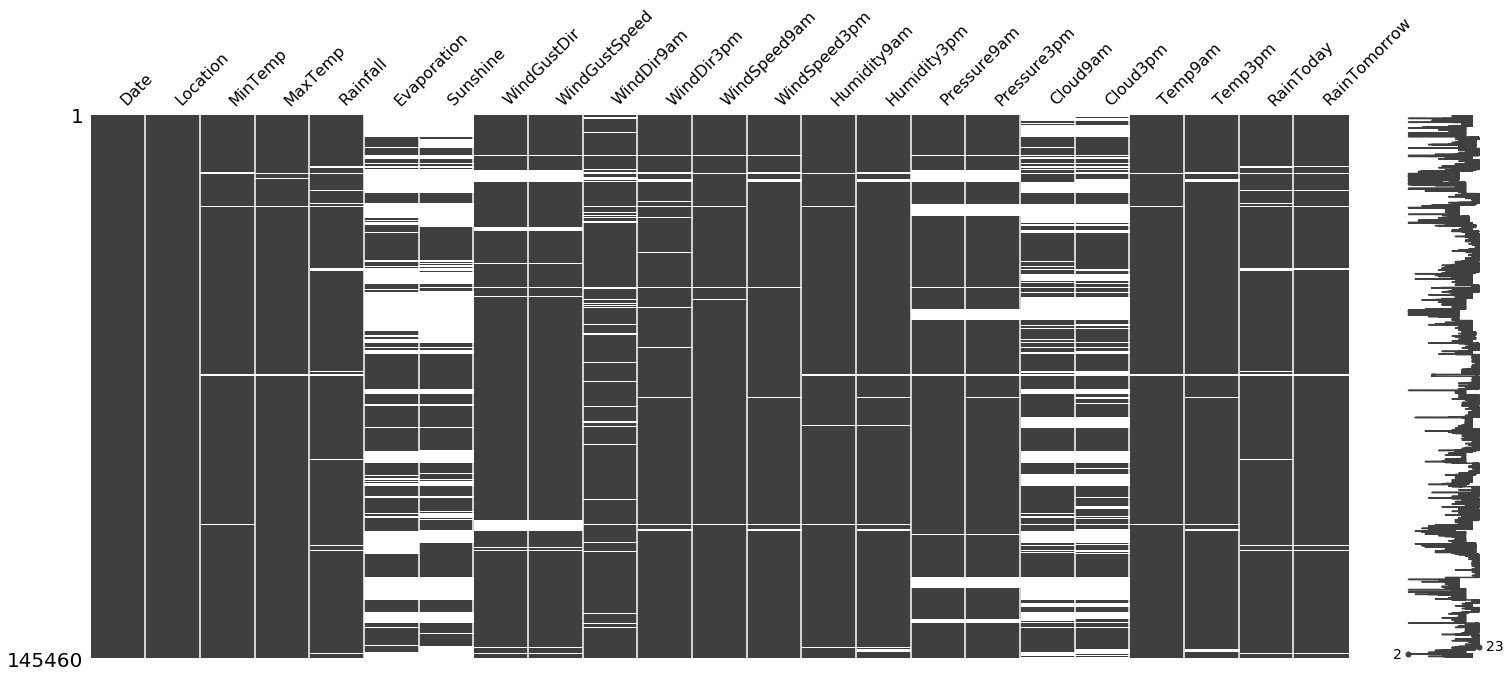

In [7]:
msno.matrix(weather)

From the above we can really tell that Evaporation, Sunshine, Cloud9AM and Cloud3PM have a lot of missing values. Over 40% are missing values in these columns.

### 1.6 Fill NA Values
\
A rule of thumb

- For columns that have numeric values, we can fill with mean
- For columns with categorical values, we can fill with mode


In [8]:
# Fill NA with mean
weather['MinTemp'] = weather['MinTemp'].fillna(weather['MinTemp'].mean())
weather['MaxTemp'] = weather['MaxTemp'].fillna(weather['MaxTemp'].mean())
weather['Rainfall'] = weather['Rainfall'].fillna(weather['Rainfall'].mean())
weather['Evaporation'] = weather['Evaporation'].fillna(weather['Evaporation'].mean())
weather['Sunshine'] = weather['Sunshine'].fillna(weather['Sunshine'].mean())
weather['WindGustSpeed'] = weather['WindGustSpeed'].fillna(weather['WindGustSpeed'].mean())
weather['WindSpeed9am'] = weather['WindSpeed9am'].fillna(weather['WindSpeed9am'].mean())
weather['WindSpeed3pm'] = weather['WindSpeed3pm'].fillna(weather['WindSpeed3pm'].mean())

weather['Humidity9am'] = weather['Humidity9am'].fillna(weather['Humidity9am'].mean())
weather['Humidity3pm'] = weather['Humidity3pm'].fillna(weather['Humidity3pm'].mean())
weather['Pressure9am'] = weather['Pressure9am'].fillna(weather['Pressure9am'].mean())

weather['Pressure3pm'] = weather['Pressure3pm'].fillna(weather['Pressure3pm'].mean())
weather['Cloud9am'] = weather['Cloud9am'].fillna(weather['Cloud9am'].mean())
weather['Cloud3pm'] = weather['Cloud3pm'].fillna(weather['Cloud3pm'].mean())

weather['Temp9am'] = weather['Temp9am'].fillna(weather['Temp9am'].mean())
weather['Temp3pm'] = weather['Temp3pm'].fillna(weather['Temp3pm'].mean())

In [9]:
# Fill NA with mode
weather['WindGustDir'] = weather['WindGustDir'].fillna(weather['WindGustDir'].mode()[0])
weather['WindDir9am'] = weather['WindDir9am'].fillna(weather['WindDir9am'].mode()[0])
weather['WindDir3pm'] = weather['WindDir3pm'].fillna(weather['WindDir3pm'].mode()[0])
weather['RainToday'] = weather['RainToday'].fillna(weather['RainToday'].mode()[0])
weather['RainTomorrow'] = weather['RainTomorrow'].fillna(weather['RainTomorrow'].mode()[0])

In [10]:
# Check if there are NA values left
weather.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

### 1.7 Change 'Yes'/'No' to 1 and 0

In [11]:
weather['RainToday'] = weather['RainToday'].map({'Yes': 1, 'No': 0})
weather['RainTomorrow'] = weather['RainTomorrow'].map({'Yes': 1, 'No': 0})

# Check our data frame one more time
weather.head(5)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0


## 2: Data Visualization
- Let's get an idea of how the data frame is distributed.
- Also, try to trim out outliers if there are any

### 2.1 RainToday and RainTomorrow

0    113580
1     31880
Name: RainToday, dtype: int64
0    113583
1     31877
Name: RainTomorrow, dtype: int64


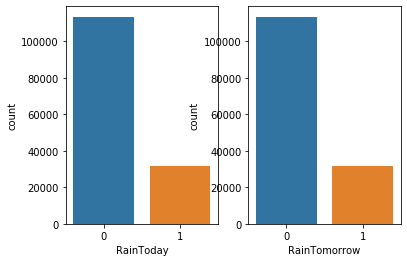

<Figure size 1440x1440 with 0 Axes>

In [12]:
fig, ax =plt.subplots(1,2)
print(weather.RainToday.value_counts())
print(weather.RainTomorrow.value_counts())

plt.figure(figsize=(20,20))
sns.countplot(data=weather,x='RainToday',ax=ax[0])
sns.countplot(data=weather,x='RainTomorrow',ax=ax[1])

We can tell that our classification are imbalanced. There are way more Non rain than Rain for tomorrow

### 2.2 Wind Direction at 9AM, 3PM. WindGust Direction

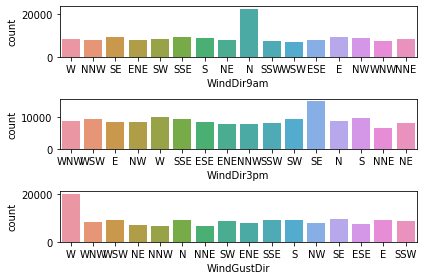

<Figure size 720x720 with 0 Axes>

In [13]:
fig, ax =plt.subplots(3,1)
plt.figure(figsize=(10,10))

sns.countplot(data=weather,x='WindDir9am',ax=ax[0])
sns.countplot(data=weather,x='WindDir3pm',ax=ax[1])
sns.countplot(data=weather,x='WindGustDir',ax=ax[2])
fig.tight_layout()

### 2.3 Label Encoding Categorical Columns

In [14]:
le = preprocessing.LabelEncoder()
weather['Location'] = le.fit_transform(weather['Location'])
weather['WindDir9am'] = le.fit_transform(weather['WindDir9am'])
weather['WindDir3pm'] = le.fit_transform(weather['WindDir3pm'])
weather['WindGustDir'] = le.fit_transform(weather['WindGustDir'])

### 2.4 HeatMap

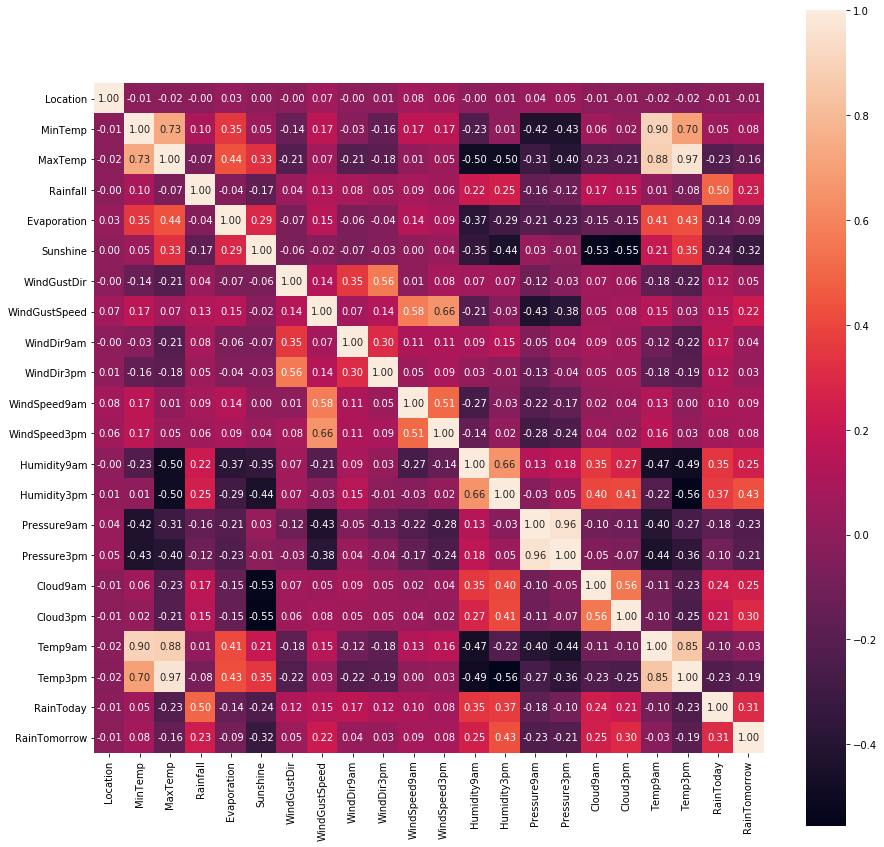

In [15]:
#Dropping date column
weather = weather.iloc[:,1:]
weather

plt.figure(figsize=(15,15))
ax = sns.heatmap(weather.corr(), square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)          
plt.show()

- Temp9AM, Temp 3PM have large collinearity with Min and max temp
- Humidity9AM and Humidity3PM also have large collinearity with Min and max temp

### 2.5 Removing Outliers
- observations between +- 3 zscores are kept.

In [16]:
print('Shape of DataFrame Before Removing Outliers', weather.shape )
data = weather[(np.abs(stats.zscore(weather)) < 3).all(axis=1)]
print('Shape of DataFrame After Removing Outliers', data.shape )


Shape of DataFrame Before Removing Outliers (145460, 22)
Shape of DataFrame After Removing Outliers (136608, 22)


### 2.6 Removing Highly Correlated Columns

In [17]:
data = data.drop(['Temp3pm','Temp9am','Humidity9am'], axis = 1)
print(len(data.columns), ' columns are left for our analysis')

19  columns are left for our analysis


### 3.2 Train Test Split
- We will use 80% as train and 20% as test
- The train and test will be shared by all models

In [48]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### 4.0 Function to calculate ROC AUC
- Here we define a function to calculate ROC AUC and print out the curves
- we can call this function later on models



In [26]:
def ROC_AUC(model):
    ns_probs = [0 for _ in range(len(y_test))]
    lr_probs = model.predict_proba(X_test)
    lr_probs = lr_probs[:, 1]

    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)

    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Logistic: ROC AUC=%.3f' % (lr_auc))

    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

### 4.1 Functions to Fit Model, Predict test, and Print Metrics
- I am going to define some functions to run Logistic, Bayes, Random Forest and XGBoost
- This will save some space as each model will run on multiple Train data

In [54]:
# Logistic Regression
def Logistic(X_train, y_train):
    logit = LogisticRegression(max_iter=500)
    logit.fit(X_train, y_train)
    y_pred = logit.predict(X_test)

    print("F1 score for logistic regression is :",f1_score(y_test, y_pred,)*100, "%")
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))
    print()
    ROC_AUC(logit)
    
# Gaussian Naive Bayes

def GNB(X_train, y_train):
    GNB = GaussianNB()
    GNB.fit(X_train, y_train)


    y_pred = GNB.predict(X_test)

    print("F1 score for Gaussian Naive Bayes is :",f1_score(y_test, y_pred,)*100, "%")
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))
    print()
    ROC_AUC(GNB)
    
# Bernoulli Naive Bayes

def BNB(X_train, y_train):
    BNB = BernoulliNB()
    BNB.fit(X_train, y_train)


    y_pred = BNB.predict(X_test)

    print("F1 score for Bernoulli Naive Bayes is :",f1_score(y_test, y_pred,)*100, "%")

    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))
    print()
    ROC_AUC(BNB)
    
# Random Forest Classifier
def RandomForest(X_train, y_train):
    model = RandomForestClassifier(n_estimators = 1000, random_state = 0)  
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)

    print("F1 score for Random Forest is :",f1_score(y_test, y_pred,)*100, "%")

    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))
    print()
    ROC_AUC(model)
    
# XGBoost
def XGBoost(X_train, y_train):
    xgbc = XGBClassifier(objective='binary:logistic')
    xgbc.fit(X_train,y_train) 
    y_pred = xgbc.predict(X_test)

    print("F1 score for XGBoost is :",f1_score(y_test, y_pred,)*100, "%")

    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))
    print()
    ROC_AUC(xgbc)
    
    


## Models with Original Train Data
- First run models on untreated train data
- This will serve as a baseline comparison
### 4.1 Logistic Regression:

C:\Users\lxie1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


F1 score for logistic regression is : 53.77442273534636 %
Accuracy: 0.8475953444110973
Precision: 0.7125625183877611
Recall: 0.4318060260295953

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.853


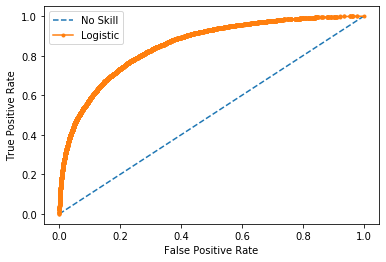

In [55]:
Logistic(X_train, y_train)

### 4.2 Gaussian Naive Bayes

F1 score for Gaussian Naive Bayes is : 55.35042735042733 %
Accuracy: 0.8087987702217992
Precision: 0.5316040059103595
Recall: 0.5772865038331253

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.825


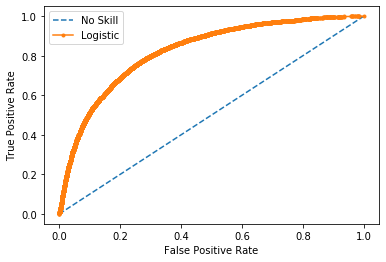

In [56]:
GNB(X_train, y_train)

### 4.3 Random Forest Model

F1 score for Random Forest is : 58.55255976421788 %
Accuracy: 0.8610277432105995
Precision: 0.7550675675675675
Recall: 0.4781600998395436

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.883


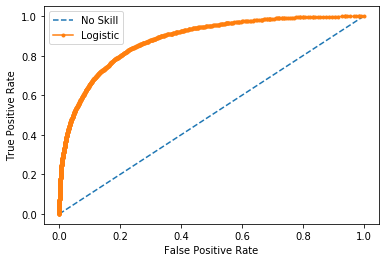

In [59]:
RandomForest(X_train, y_train)

### 4.4 XGBoost

C:\Users\lxie1\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:45:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lxie1\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\lxie1\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


F1 score for XGBoost is : 60.62322946175638 %
Accuracy: 0.8626381670448723
Precision: 0.7366139724630291
Recall: 0.5150650739882332

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.884


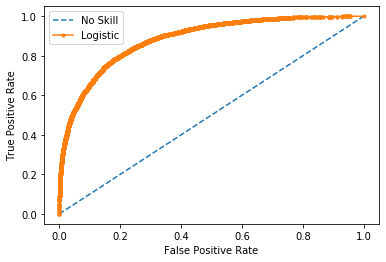

In [58]:
XGBoost(X_train, y_train)

## 5.0 Models Performance with SMOTE
- Here we will apply oversampling, SMOTE to the train data

In [50]:
counter = Counter(y_train)
print('Before', counter)

smt = SMOTE()

X_smote, y_smote = smt.fit_resample(X_train, y_train)

counter = Counter(y_smote)
print('After', counter)

Before Counter({0: 86764, 1: 22522})
After Counter({1: 86764, 0: 86764})


- SMOTE makes two classes balanced
- It is also really fast

### 5.1 Logistic Regression under SMOTE

F1 score for logistic regression is : 57.749498582197944 %
Accuracy: 0.7764072908279043
Precision: 0.4717514124293785
Recall: 0.7443394544482083

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.851


C:\Users\lxie1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


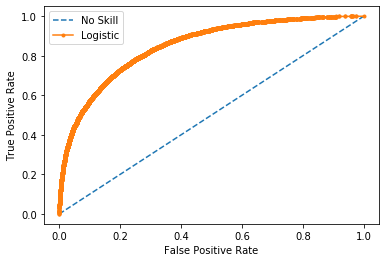

In [60]:
Logistic(X_smote, y_smote)

### 5.2 Gaussian Naive Bayes under SMOTE


F1 score for Gaussian Naive Bayes is : 56.01241272304113 %
Accuracy: 0.7717224214918381
Precision: 0.4633605600933489
Recall: 0.7079693349973257

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.826


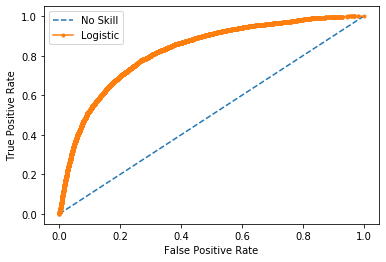

In [61]:
GNB(X_smote, y_smote)

### 5.4 Random Forest under Smote

F1 score for Random Forest is : 62.17942783075642 %
Accuracy: 0.8504867872044506
Precision: 0.6467642526964561
Recall: 0.5986806917454092

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.879


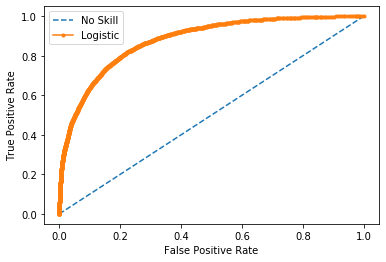

In [63]:
RandomForest(X_smote, y_smote)

### 5.5 XGBoost under SMOTE

C:\Users\lxie1\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:09:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lxie1\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\lxie1\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


F1 score for XGBoost is : 60.45514848453924 %
Accuracy: 0.8581729009589342
Precision: 0.7069212410501193
Recall: 0.5280798716348726

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.878


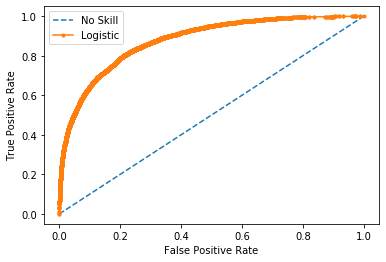

In [64]:
XGBoost(X_smote, y_smote)

### 6.0 Models under SMOTE + Tomek

In [73]:
counter = Counter(y_train)
print('Before', counter)

smt = SMOTETomek()

X_T, y_T = smt.fit_resample(X_train, y_train)

counter = Counter(y_T)
print('After', counter)

Before Counter({0: 86764, 1: 22522})
After Counter({1: 86511, 0: 86511})


### 6.1 Logistic Regression under SMOTE Tomek

C:\Users\lxie1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


F1 score for logistic regression is : 56.17859763127555 %
Accuracy: 0.846973135202401
Precision: 0.681586978636826
Recall: 0.4778035300410055

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.853


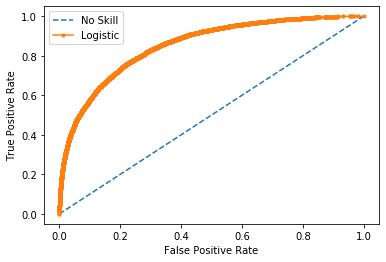

In [71]:
Logistic(X_T, y_T)

### 6.2 Gaussian Naive Bayes under SMOTETomek

F1 score for Gaussian Naive Bayes is : 55.30954966998078 %
Accuracy: 0.8042237025107971
Precision: 0.5204402515723271
Recall: 0.5901230165804956

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.824


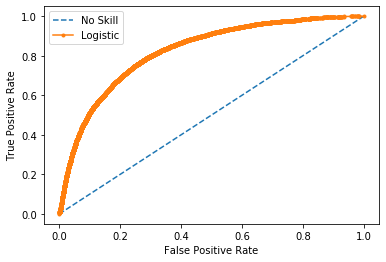

In [72]:
GNB(X_T, y_T)

### 6.3 Random Forest under SMOTETomek


F1 score for Random Forest is : 62.07727230612434 %
Accuracy: 0.8501939828709465
Precision: 0.6462191358024691
Recall: 0.5972544125512569

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.879


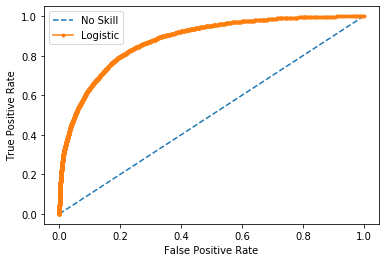

In [74]:
RandomForest(X_T, y_T)

### 6.4 XGBoost for SMOTETomek

C:\Users\lxie1\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:13:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lxie1\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\lxie1\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


F1 score for XGBoost is : 60.80519217117939 %
Accuracy: 0.8585389063758143
Precision: 0.7050799623706491
Recall: 0.5344981280085577

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.879


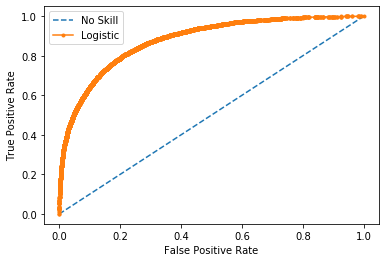

In [75]:
XGBoost(X_T, y_T)

## 7.0 Models under SMOTE ENN

In [76]:
counter = Counter(y_train)
print('Before', counter)

smt = SMOTEENN()

X_SENN, y_SENN = smt.fit_resample(X_train, y_train)

counter = Counter(y_SENN)
print('After', counter)

Before Counter({0: 86764, 1: 22522})
After Counter({1: 80911, 0: 56080})


### 7.1 Logistic Regression SMOTEENN

C:\Users\lxie1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


F1 score for logistic regression is : 53.94341441288201 %
Accuracy: 0.7026937998682381
Precision: 0.3954938476887263
Recall: 0.8481012658227848

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.851


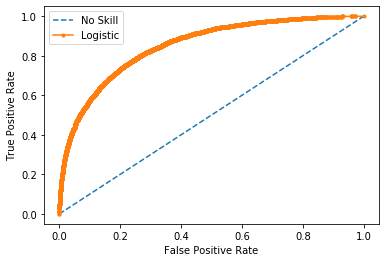

In [77]:
Logistic(X_SENN, y_SENN)

### 7.2 Gaussian Naive Bayes

F1 score for Gaussian Naive Bayes is : 54.85194205871042 %
Accuracy: 0.7421857843496084
Precision: 0.4281997398178725
Recall: 0.7628810839721876

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.821


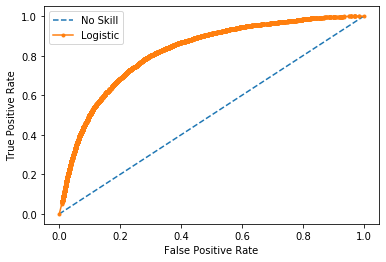

In [78]:
GNB(X_SENN, y_SENN)

### 7.3 Random Forest under SMOTEENN

F1 score for Random Forest is : 61.16241927643913 %
Accuracy: 0.795293170338921
Precision: 0.5009099181073703
Recall: 0.7851666963808166

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.875


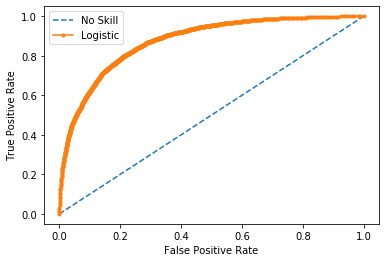

In [79]:
RandomForest(X_SENN, y_SENN)

### 7.4 XGBoost under SMOTEENN

C:\Users\lxie1\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:09:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lxie1\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\lxie1\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


F1 score for XGBoost is : 62.51218597675291 %
Accuracy: 0.8170338921016032
Precision: 0.539477090344292
Recall: 0.7430914601533251

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.879


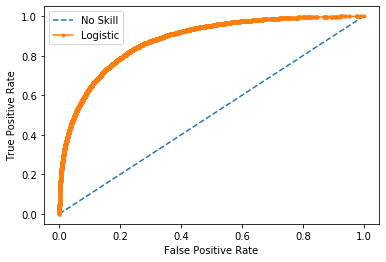

In [80]:
XGBoost(X_SENN, y_SENN)

## Conclusion:
- Random Forest Model with the original untreated data is the best performing model
- XGBoost is also very close performance-wise in all train data\
\
It may be beneficial to apply oversampling and undersampling only when dealing with extreme class imbalance.\
\
In this case, the class is 20% to 80%, 1:4, which is not extreme class imblanace.\
\
Consider the time it takes for those techniques, in this case it is better to leave the data untreated.